In [1]:
from ase.lattice.cubic import SimpleCubicFactory, BodyCenteredCubicFactory

from ase.lattice.tetragonal import CenteredTetragonalFactory

class Mn2AuFactory(CenteredTetragonalFactory):
    "A factory for creating Mn2Au lattices."
    bravais_basis = [[0.0, 0.0,  0.333333], [0.0 , 0.0, 0.666666], [0, 0, 0]]
    element_basis = (0, 0, 1)

Mn2Au = Mn2AuFactory()

alat = 3.1445
factor = 2.5658

cubic_unit_cell = Mn2Au(["Mn", "Au"], latticeconstant=[alat, factor * alat]) 

print(cubic_unit_cell)
cubic_unit_cell.wrap()
cubic_unit_cell.write("Mn2Au_cubic.xyz")

Lattice(symbols='Mn2AuMn2Au', pbc=True, cell=[3.1445, 3.1445, 8.0681581])


In [2]:
cubic_unit_cell.pbc


array([ True,  True,  True])

In [3]:
1.0 / cubic_unit_cell.cell.lengths() / 0.03618256

array([8.7891952 , 8.7891952 , 3.42551844])

In [4]:
cubic_unit_cell.positions

array([[ 1.20737065e-17, -1.20737065e-17,  2.68938334e+00],
       [ 2.41474131e-17, -2.41474131e-17,  5.37876669e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.57225000e+00,  1.57225000e+00,  6.72346239e+00],
       [ 1.57225000e+00,  1.57225000e+00,  1.34468764e+00],
       [ 1.57225000e+00,  1.57225000e+00,  4.03407905e+00]])

In [5]:
# The lattice units from the paper
6.29 / 1.8897259886

3.3285248961728757

In [6]:
# c/a from the paper
16.142 / 6.291

2.5658877761882053

In [7]:
from ase import Atoms

def make_primitive_Mn2Au_cell(alat, factor):
    
    cell = [[-alat / 2.0, alat / 2.0, alat * factor / 2.0],
            [alat / 2.0, -alat / 2.0, alat * factor / 2.0],
            [alat / 2.0, alat / 2.0, -alat * factor / 2.0]
           ]
    
    Au = Atoms("Au", scaled_positions=[[0.0, 0.0, 0.0]], cell=cell, pbc=True)
    Mn2 = Atoms("Mn2", scaled_positions=[[0.333, 0.333, 0.0], [0.6666, 0.666, 0.0]], cell=cell, pbc=True)

    return Au + Mn2


In [8]:
primitive_unit_cell = make_primitive_Mn2Au_cell(alat, factor)
print(primitive_unit_cell)

Atoms(symbols='AuMn2', pbc=True, cell=[[-1.57225, 1.57225, 4.03407905], [1.57225, -1.57225, 4.03407905], [1.57225, 1.57225, -4.03407905]])


In [9]:
primitive_unit_cell.positions

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.68669665e+00],
       [-9.43350000e-04,  9.43350000e-04,  5.37581374e+00]])

In [10]:
(1.0 / primitive_unit_cell.cell.lengths()) / 6.0

array([0.03618256, 0.03618256, 0.03618256])

In [11]:
primitive_unit_cell.get_all_distances()

array([[0.        , 2.68669665, 5.37581391],
       [2.68669665, 0.        , 2.68911743],
       [5.37581391, 2.68911743, 0.        ]])

In [13]:
primitive_unit_cell.cell.get_bravais_lattice()

BCT(a=3.1445000000000002949, c=8.0681580999999997772)

In [53]:
primitive_unit_cell.write("Mn2Au_primitive.xyz")

In [15]:
from ase.calculators.vasp import Vasp

n_par = 10

VaspCalc = Vasp(setups={'W': '_sv'}, # Check pseudopotentials for Mn and Au here
                npar=n_par, kpts=[3,3,3],
                istart=0, # start from scratch
                icharg=2, # default for istart=0
                isif=2, 
                nsim=2,
                prec='Accurate',
                encut=500,
                ediff=1.e-6,
                ediffg=-0.04,
                nelm=100,
                nelmin=5,
                algo="Normal",
                isym=0,
                ismear=1,
                sigma=0.1,
                ispin=2, # spin polarised calculation
                magmom=[0.0, 2.0, -2.0], # a first guess for the Mn2Au
                xc='PBE')

In [21]:
VaspCalc.write_incar(cubic_unit_cell)

ValueError: Expected length of magmom tag to be 6, i.e. 1 value per atom, but got 3

In [ ]:
VaspCalc

In [20]:
primitive_unit_cell

Atoms(symbols='AuMn2', pbc=True, cell=[[-1.57225, 1.57225, 4.03407905], [1.57225, -1.57225, 4.03407905], [1.57225, 1.57225, -4.03407905]])

In [18]:
cubic_unit_cell

Lattice(symbols='Mn2AuMn2Au', pbc=True, cell=[3.1445, 3.1445, 8.0681581])

In [37]:
cubic_unit_cell.get_all_distances()

array([[0.        , 2.68938334, 2.68938334, 4.60627115, 2.5984893 ,
        2.5984893 ],
       [2.68938334, 0.        , 5.37876669, 2.5984893 , 4.60627115,
        2.59848513],
       [2.68938334, 5.37876669, 0.        , 7.08158786, 2.59848513,
        4.60627115],
       [4.60627115, 2.5984893 , 7.08158786, 0.        , 5.37877476,
        2.68938334],
       [2.5984893 , 4.60627115, 2.59848513, 5.37877476, 0.        ,
        2.68939141],
       [2.5984893 , 2.59848513, 4.60627115, 2.68938334, 2.68939141,
        0.        ]])

## The both cells give similar results:

Cubic cell enrgy: -42.01578777
Energy per atom: -7.0026312950000005
Forces
```
[[-1.23000000e-06 -1.16000000e-06 -1.00935569e+00]
 [ 5.30000000e-07 -9.60000000e-07  1.01005875e+00]
 [-5.30000000e-07  2.86000000e-06 -7.73770000e-04]
 [-5.20000000e-07  7.40000000e-07 -1.01074019e+00]
 [-2.00000000e-08 -7.00000000e-07  1.01015928e+00]
 [ 1.78000000e-06 -7.90000000e-07  6.51620000e-04]]
 ```
Stress
```
[-1.42497944e-01 -1.42497746e-01 -1.27948453e-01  2.81429646e-08
  1.66648294e-09  1.42481170e-07]
```
Total magnetic moment
0.0011857
Magnetic moments:
```
[-3.209  3.209 -0.    -3.209  3.209  0.   ]
```
Primitive

-20.99605531
Energy per atom: -6.998685103333333
Forces
```
[[-0.00552589  0.00552338 -0.04020551]
 [-0.00256008  0.00255829 -0.99728084]
 [ 0.00808597 -0.00808167  1.03748635]]
```
Stress
```
[-1.39089114e-01 -1.39089206e-01 -1.28556836e-01  1.46399977e-04
 -1.46068509e-04  8.86930930e-07]
```
Total magnetic moment
0.0018399
Magnetic moments:
```
[ 1.000e-03 -3.188e+00  3.189e+00]
```


## TO DO:

- Energy cut off and k-points convergence tests: values of kpts = `[11, 11, 11]` and encut=600 eV seems to be well converged to tolerance of 1.0e-3
- Identify lattice constants and zero pressure and elastic constants
- Apply the straining

## To discuss:
- Importance and relevance of [Dudarev](https://www.vasp.at/wiki/index.php/LDAUTYPE#cite_note-rohrbach:jcp:03-1) approach: **Only important for oxides!**

# Convergence test results:


In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [54]:
kpts_results = pd.read_csv("convergence_tests/kpts_conv_results.csv", index_col=0)
encut_results = pd.read_csv("convergence_tests/encut_conv_results.csv", index_col=0)

In [55]:
kpts_results["energy_error"] = np.abs((kpts_results.energy - kpts_results.energy.iloc[-1]))
kpts_results["magmom_error"] = np.abs((kpts_results.total_magmom - kpts_results.total_magmom.iloc[-1]))
encut_results["energy_error"] = np.abs((encut_results.energy - encut_results.energy.iloc[-1]))
encut_results["magmom_error"] = np.abs((encut_results.total_magmom - encut_results.total_magmom.iloc[-1]))

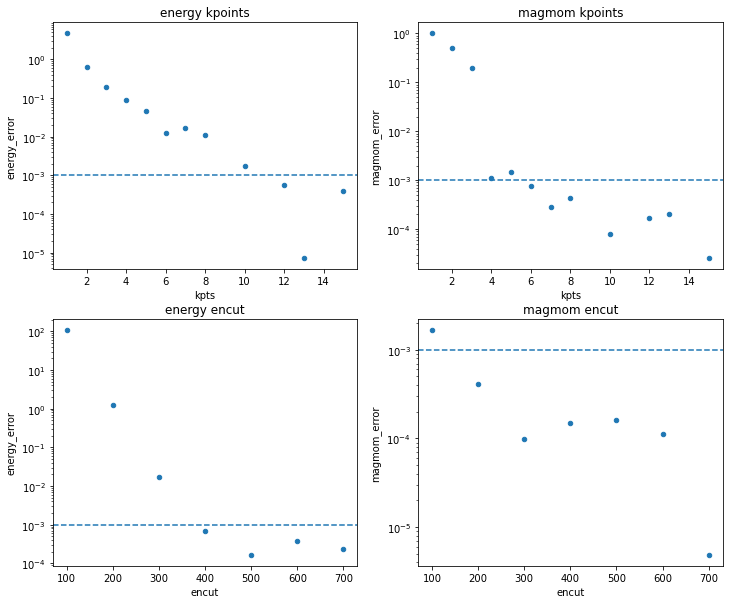

In [63]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

kpts_results.iloc[:-1].plot(x="kpts", y="energy_error", kind="scatter", logy=True, ax=axes[0, 0], title="energy kpoints")
kpts_results.iloc[:-1].plot(x="kpts", y="magmom_error", kind="scatter", logy=True, ax=axes[0, 1], title="magmom kpoints")

encut_results.iloc[:-1].plot(x="encut", y="energy_error", kind="scatter", logy=True, ax=axes[1, 0], title="energy encut")
encut_results.iloc[:-1].plot(x="encut", y="magmom_error", kind="scatter", logy=True, ax=axes[1, 1], title="magmom encut")

for axes_row in axes:
    for ax in axes_row:
        ax.axhline(1.0e-3, linestyle="dashed")

In [84]:
import os
from ase.io import read

In [122]:
kpts_files = [fn for fn in os.listdir("convergence_tests/conv_files/") if "kpts" in fn]
kpts_files.sort(key = lambda x: int(x.split("_")[0]))
kpts_files

['1_kpts_results.xyz',
 '2_kpts_results.xyz',
 '3_kpts_results.xyz',
 '4_kpts_results.xyz',
 '5_kpts_results.xyz',
 '6_kpts_results.xyz',
 '7_kpts_results.xyz',
 '8_kpts_results.xyz',
 '10_kpts_results.xyz',
 '12_kpts_results.xyz',
 '13_kpts_results.xyz',
 '15_kpts_results.xyz',
 '19_kpts_results.xyz']

In [136]:
ref_atoms = read("convergence_tests/conv_files/" + kpts_files[-1])
reff_stress = ref_atoms.get_stress()
ref_forces = ref_atoms.get_forces()
reff_stress

array([-1.43103807e-01, -1.43103802e-01, -1.25041472e-01,  1.46388143e-04,
       -1.45565250e-04,  8.38365747e-07])

In [137]:
ref_atoms.get_stress?

Signature: ref_atoms.get_stress(voigt=True, apply_constraint=True, include_ideal_gas=False)
Docstring:
Calculate stress tensor.

Returns an array of the six independent components of the
symmetric stress tensor, in the traditional Voigt order
(xx, yy, zz, yz, xz, xy) or as a 3x3 matrix.  Default is Voigt
order.

The ideal gas contribution to the stresses is added if the
atoms have momenta and ``include_ideal_gas`` is set to True.
File:      ~/anaconda3/envs/quippy/lib/python3.7/site-packages/ase/atoms.py
Type:      method


In [161]:
encut_files = [fn for fn in os.listdir("convergence_tests/conv_files/") if "encut" in fn]
encut_files.sort(key = lambda x: int(x.split("_")[0]))
encut_ref_atoms = read("convergence_tests/conv_files/" + encut_files[-1])
encut_reff_stress = encut_ref_atoms.get_stress()
encut_ref_forces = encut_ref_atoms.get_forces()
encut_reff_stress

array([-1.39388688e-01, -1.39388671e-01, -1.28826129e-01,  1.46272188e-04,
       -1.46279434e-04,  7.86105591e-07])

In [162]:
stress_error_kpts = pd.DataFrame()
for fn in kpts_files[:-1]:
    n_kpts = int(fn.split("_")[0])
    atoms = read("convergence_tests/conv_files/" + fn)
    stress = atoms.get_stress()
    stress_error = np.abs(stress - reff_stress)
    forces = atoms.get_forces()
    forces_error = np.abs(forces - ref_forces)
    
    forces_error = forces_error.max(axis=0)
    stress_error_kpts = stress_error_kpts.append({"kpts" : n_kpts,
                                                  "fx" : forces_error[0],
                                                  "fy" : forces_error[1],
                                                  "fz" : forces_error[2],
                                                  "xx" : stress_error[0], 
                                                  "yy" : stress_error[1],
                                                  "zz" : stress_error[2], 
                                                  "yz" : stress_error[3], 
                                                  "xz" : stress_error[4], 
                                                  "xy" : stress_error[5]}, ignore_index=True)
    

stress_error_encut = pd.DataFrame()
for fn in encut_files[:-1]:
    encut = int(fn.split("_")[0])
    atoms = read("convergence_tests/conv_files/" + fn)
    stress = atoms.get_stress()
    stress_error = np.abs(stress - encut_reff_stress)
    forces = atoms.get_forces()
    forces_error = np.abs(forces - encut_ref_forces)
    
    forces_error = forces_error.max(axis=0)
    stress_error_encut = stress_error_encut.append({"encut" : encut,
                                                    "fx" : forces_error[0],
                                                    "fy" : forces_error[1],
                                                    "fz" : forces_error[2],
                                                    "xx" : stress_error[0], 
                                                    "yy" : stress_error[1],
                                                    "zz" : stress_error[2], 
                                                    "yz" : stress_error[3], 
                                                    "xz" : stress_error[4], 
                                                    "xy" : stress_error[5]}, ignore_index=True)

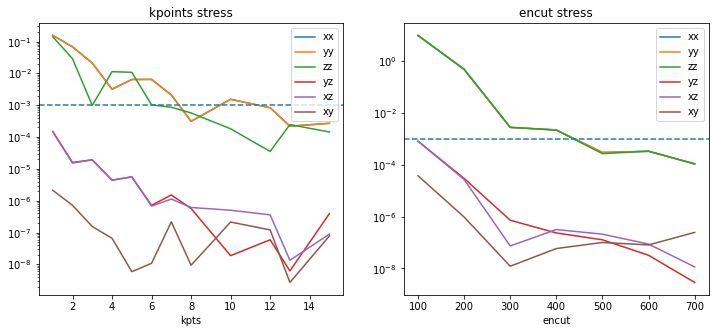

In [163]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
for component in ["xx", "yy", "zz", "yz", "xz", "xy"]:
    stress_error_kpts.plot(x="kpts", y=component, logy=True, ax=axes[0], title="kpoints stress")
    stress_error_encut.plot(x="encut", y=component, logy=True, ax=axes[1], title="encut stress")
    
for ax in axes:
    ax.axhline(1.0e-3, linestyle="dashed")

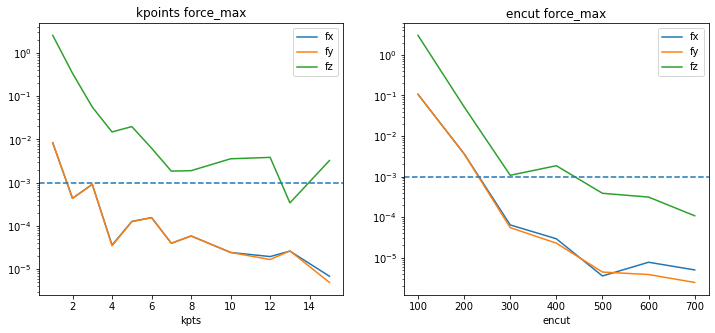

In [164]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
for component in ["fx", "fy", "fz"]:
    stress_error_kpts.plot(x="kpts", y=component, logy=True, ax=axes[0], title="kpoints force_max")
    stress_error_encut.plot(x="encut", y=component, logy=True, ax=axes[1], title="encut force_max")
    
for ax in axes:
    ax.axhline(1.0e-3, linestyle="dashed")